# Notebook 9: Confidence Intervals 
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [16]:
import numpy as np 
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.stats.api as sms
%matplotlib inline

### Summary of Built-In Python Functions for Hypothesis Tests:
***

This list is by no means comprehensive - it just covers the scope of hypothesis tests we will use in this class:


Hypothesis test for a sample proportion:

`stats.binomtest(140, 250, p=0.5, alternative='two-sided')`
or, using the normal approximation to the binomial thanks to the central limit theorem (assuming np>=15):

`sms.proportions_ztest(count=140, nobs=250, value=0.50, prop_var=.5)`

Hypothesis test for difference in sample proportions:

`sms.test_proportions_2indep(93, 453, 197, 261, value=None, compare='diff', alternative='two-sided')`

Test for difference in sample means: 
`res = stats.ttest_ind(SamplePageA,SamplePageB, equal_var=False)`
`print(f'p-value for two sided test: {res.pvalue:.4f}')`




### Exercise 1 - Sampling Confidence Intervals 
*** 

In this exercise we'll get some experience implementing confidence intervals for samples of a population.  Suppose that we wish to sample household incomes from a population in units of hundreds-of-thousands of dollars.  In general it is not necessary that we know the distribution that the quantity of interest follows, but in this case we'll assume that household $\color{red}{\text{income follows a Weibull distribution}}$.

Weibull documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

We can draw samples from this population and plot the histogram as follows: 

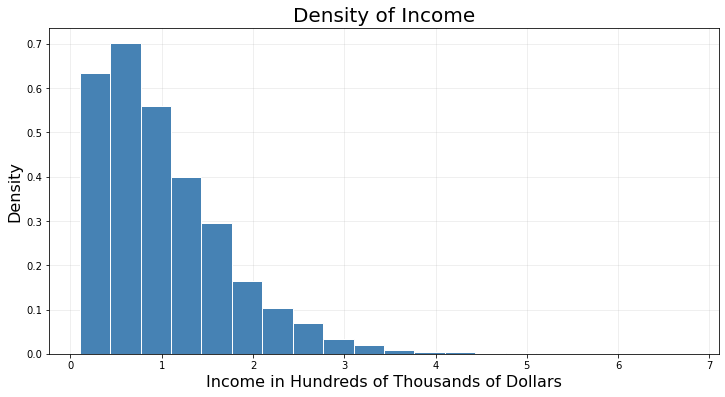

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
x = stats.weibull_min.rvs(loc=0.1, c=1.3, size=10000)
  # 10,000 randomly generated draws from this Weibull distribution stored in x.
  # The histogram reveals the shape of the distribution we are working with.
pd.Series(x).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)
  # A histogram of x
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel("Income in Hundreds of Thousands of Dollars", fontsize=16)
ax.set_ylabel("Density", fontsize=16)
ax.set_title("Density of Income", fontsize=20);

**Part A**: Complete the following $\color{red}{\text{function that draws 20 independent samples of size}}$ $\color{red}{n}$ from the population and plots confidence intervals for each sample against the mean.  Because we know the distribution from sampling from, we can use the exact mean and variance in the determination of the confidence intervals.   

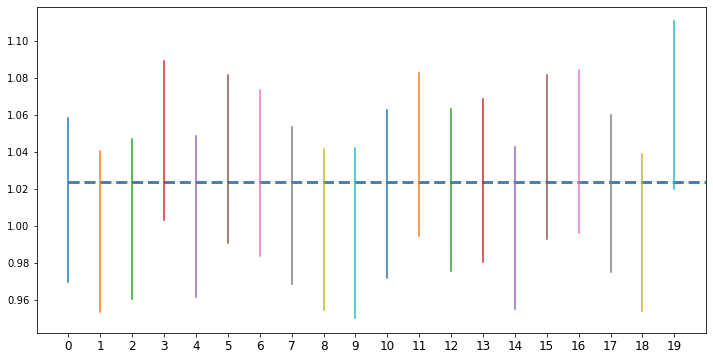

In [39]:
def income_CI(n=100, alpha=.05):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    # Get the true mean and variance of the distribution 
    mean, var = stats.weibull_min.stats(loc=0.1, c=1.3, moments='mv')
    # 'moments' is a reserved word. 'm' is mean. 'v' is variance. 's' is skew. 'k' is kurtosis.
    
    ax.plot([0,20], [mean, mean], color="steelblue", ls='--', lw=3)
    # .plot plots a line from (0, mean) to (20, mean). i.e. Horizontal at height 'mean'.
    # ls is line style, and lw is line width
    
    # Now, draw 20 independent samples of size n 
    for sId in range(20):
        # Draw samples from Weibull distribution 
        x = stats.weibull_min.rvs(loc=0.1, c=1.3, size=n)
        # 100 random choices from the Weibull are now stored in x
      
        #Calculate the confidence interval for the mean using built-in Python function:      
        (CImin, CImax) = stats.t.interval(1-alpha, df=len(x)-1, loc=np.mean(x), scale=stats.sem(x))
       
        ax.plot([sId, sId], [CImin, CImax])
        
        
    ax.set_xlim([-1,20])
    plt.xticks(range(20), fontsize=12)

# Now, call the function        
income_CI(n=1000)


### Built-In Python Functions for Calculating Confidence Intervals:

CI for a sample mean: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
`stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))` 


CI for proportion (https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html)
`sms.proportion_confint(count, nobs, alpha=0.05, method='normal')`


CI for difference in proportions:
https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.confint_proportions_2indep.html
`sms.confint_proportions_2indep(count1, nobs1, count2, nobs2, alpha=0.05)`

CI for difference in sample means: https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.html
cm=sms.CompareMeans(sms.stats.DescrStatsW(dataset1), sms.DescrStatsW(dataset2))
cm.tconfint_diff(alpha=0.05, usevar='unequal'))



### Exercise 2 - Single Sample CI
*** 
Load `hubble.csv` into Python. A description of the variables can be obtained from page 73 of https://cran.r-project.org/web/packages/gamair/gamair.pdf.  

In [17]:
# Path to the data - select the path that works for you 
file_path = 'hubble.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

# Look at the data
df.describe()


,Unnamed: 0,y,x
count,24.000000,24.00000,24.000000
mean,12.500000,924.37500,12.054583
std,7.071068,512.81396,5.814649
min,1.000000,80.00000,2.000000
25%,6.750000,616.50000,8.530000
50%,12.500000,827.00000,13.080000
75%,18.250000,1423.25000,15.870000
max,24.000000,1794.00000,21.980000


In [4]:
# Check the data types
df.dtypes

Unnamed: 0      int64
Galaxy         object
y               int64
x             float64
dtype: object

#### (a) Calculate the 85% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs in Python using built-in functions.     (Note: 'x' is distance and 'y' is velocity as mentioned on page 73 of the documentation)

In [22]:
stats.t.interval(alpha=0.95, df=len(df['x'])-1, loc=np.mean(df['x']), scale=stats.sem(df['x']))

(9.599272544248015, 14.509894122418649)

#### (b) Interpret the confidence interval.

 85% of intervals created in this manner will contain the true mean of a galaxy's distance from Earth. This claim means that, if we were to collect these measurements over and over again and calculate the confidence interval for each sample, then about 85% of the CI's would contain the true mean.

### Exercise 2 - Two Sample CI
*** 
Load `clean_titanic_data` into Python.

In [23]:
# Path to the data - select the path that works for you 
file_path = 'clean_titanic_data.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

# Look at the data.
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


#### a) Calculate a 98% CI for the survival rate of men (all passenger classes).

In [32]:
male_survived = df.loc[df['Sex']=='male', 'Survived'].sum()
print("{} men survived the disaster".format(male_survived))
male_total = len(df.loc[(df["Sex"]=='male')])
print("... out of {} men total".format(male_total))


##SO the CI is: 
sms.proportion_confint(93, 453, alpha=0.05, method='normal')



93 men survived the disaster
... out of 453 men total


(0.1681022467502887, 0.2424937797397775)


#### c) Calculate a 98% CI for the survival rate of women (all passenger classes).

In [13]:
#To DO

197 women survived the disaster
... out of 261 women total
For a CI of: ( 0.692839887327238  ,  0.8167386567340648 )



#### d) Calculate a 98% CI for the difference in survival rates between men and women.

In [35]:
sms.confint_proportions_2indep(93, 453, 197, 261, alpha=0.05)

(-0.6088894385450798, -0.4811979067685913)


#### e) What can you conclude?

**Solution**: TO Do